# Setup

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install zennit-crp

  Using cached zennit_crp-0.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached zennit-0.4.6-py3-none-any.whl.metadata (10 kB)
Using cached zennit_crp-0.6.0-py3-none-any.whl (35 kB)
Using cached zennit-0.4.6-py3-none-any.whl (50 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.2 MB/s eta 0:00:00a 0:00:01


In [4]:
import torch
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

# Add the parent directory to the Python path - bad practice, but it's just for the example
project_root = "/home/heydari/FHHI-XAI/"
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.glocal_analysis import run_analysis 
from src.datasets.flood_dataset import FloodDataset
from src.datasets.DLR_dataset import DatasetDLR
from src.plot_crp_explanations import plot_explanations, plot_one_image_explanation
from src.minio_client import MinIOClient
from LCRP.models import get_model 

ModuleNotFoundError: No module named 'src'

In [7]:
device = "cuda:1" if torch.cuda.is_available() else "cpu"

In [9]:
device

'cpu'

# AUTH

## Loading dataset and model

In [22]:
# Define transformation (if needed)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
])

# Load dataset
root_dir = "../src/datasets/data/General_Flood_v3/"
dataset = FloodDataset(root_dir=root_dir, split="train", transform=transform)

model_name = "unet"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Loading unet with path to checkpoint
model = get_model(model_name=model_name, classes=2, ckpt_path="../src/models/unet_flood_modified.pt")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /smp-hub/vgg13.imagenet/resolve/1b70ff2580f101a8007a48b51e2b5d1e5925dc42/config.json HTTP/1.1" 307 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /api/resolve-cache/models/smp-hub/vgg13.imagenet/1b70ff2580f101a8007a48b51e2b5d1e5925dc42/config.json HTTP/1.1" 200 0
DEBUG:filelock:Attempting to acquire lock 124702325132880 on /home/heydari/.cache/huggingface/hub/.locks/models--smp-hub--vgg13.imagenet/879c59b3870194ae248b52920479fed460415e62.lock
DEBUG:filelock:Lock 124702325132880 acquired on /home/heydari/.cache/huggingface/hub/.locks/models--smp-hub--vgg13.imagenet/879c59b3870194ae248b52920479fed460415e62.lock
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "GET /api/resolve-cache/models/smp-hub/vgg13.imagenet/1b70ff2580f101a8007a48b51e2b5d1e5925dc42/config.json HTTP/1.1" 200 156
DEBUG:filelock:Attempting to release loc

Loaded checkpoint ../src/models/unet_flood_modified.pt


## Running analysis and plotting results

In [23]:
output_dir = "../src/output/crp/unet_flood"

In [14]:
#run_analysis(model_name, model, dataset, output_dir=output_dir, device=device)

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 4595
/home/heydari/.virtualenvs/TEMA-FHHI-PY/lib/python3.10/site-packages/torch/cuda/memory.py:489: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/heydari/.virtualenvs/TEMA-FHHI-PY/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/heydari/.virtualenvs/TEMA-FHHI-PY/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='n

torch.Size([3, 480, 480])
MEMORY STARTING: 0.07GB (max: 0.07GB)


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/charis/CharisSIL-Bold.ttf', name='Charis SIL', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Yrsa-Regular.ttf', name='Yrsa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/roboto/unhinted/RobotoTTF/Roboto-Medium.ttf', name='Roboto', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='

MEMORY AFTER FIGURE CREATION: 0.07GB (max: 0.07GB)
MEMORY BEFORE SEGMENTATION ATTR: 0.07GB (max: 0.07GB)


ERROR:LCRP.utils.crp:Prediction time: 0.18204283714294434, Backward time: 0.10216903686523438, Full attribution time: 0.10320687294006348


MEMORY AFTER SEGMENTATION ATTR: 0.09GB (max: 1.33GB)
MEMORY AFTER DETECTION/SEGMENTATION: 0.09GB (max: 1.33GB)
Concepts: 

ERROR:LCRP.utils.crp:Prediction time: 0.023916959762573242, Backward time: 0.04191899299621582, Full attribution time: 0.04271054267883301
DEBUG:src.plot_crp_explanations:Time to compute conditional heatmaps: 0.07s
DEBUG:PIL.TiffImagePlugin:tag: ImageWidth (256) - type: short (3) - value: b'\x02\xbc'
DEBUG:PIL.TiffImagePlugin:tag: ImageWidth (256) - type: short (3) - value: b'\x13\xaa'
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.TiffImagePlugin:tag: ImageLength (257) - type: short (3) - value: b'\x01\x8a'
DEBUG:PIL.Image:Importing AvifImagePlugin
DEBUG:PIL.Image:Importing AvifImagePlugin
DEBUG:PIL.TiffImagePlugin:tag: ImageWidth (256) - type: short (3) - value: b'\x04\xb0'
DEBUG:PIL.TiffImagePlugin:tag: ImageLength (257) - type: short (3) - value: b'\x0c\xcc'
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 2409
DEBUG:PIL.TiffImagePlugin:tag: BitsPerSample (258) - type: short (3) Tag Location: 46 - Data Location: 158 - value: b'\x00\x

torch.return_types.topk(
values=tensor([0.0148, 0.0145, 0.0139], device='cuda:0'),
indices=tensor([266, 297, 235], device='cuda:0'))
MEMORY BEFORE CONDITIONAL HEATMAPS: 0.09GB (max: 1.33GB)
MEMORY AFTER CONDITIONAL HEATMAPS: 0.96GB (max: 4.02GB)
Computing reference images...
MEMORY BEFORE REF IMAGES: 0.96GB (max: 4.02GB)


DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 8192
DEBUG:PIL.TiffImagePlugin:tag: ImageWidth (256) - type: short (3) - value: b'\x13\xaa'
DEBUG:PIL.TiffImagePlugin:tag: ImageLength (257) - type: short (3) - value: b'\x0c\xcc'
DEBUG:PIL.TiffImagePlugin:tag: BitsPerSample (258) - type: short (3) Tag Location: 46 - Data Location: 182 - value: b'\x00\x08\x00\x08\x00\x08'
DEBUG:PIL.TiffImagePlugin:tag: ImageWidth (256) - type: short (3) - value: b'\x02\xbc'
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.TiffImagePlugin:tag: PhotometricInterpretation (262) - type: short (3) - value: b'\x00\x02'
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.TiffImagePlugin:tag: ImageLength (257) - type: short (3) - value: b'\x01\x8a'
DEBUG:PIL.TiffImagePlugin:tag: ImageWidth (256) - type: short (3) - value: b'\x04\xb0'
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 2409
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.TiffImagePlugin:tag: ImageD

MEMORY AFTER REF IMAGES: 0.97GB (max: 4.35GB)
Plotting...
MEMORY PLOTTING CONCEPT 0: 0.97GB (max: 4.35GB)
MEMORY PLOTTING CONCEPT 1: 0.97GB (max: 4.35GB)
MEMORY PLOTTING CONCEPT 2: 0.97GB (max: 4.35GB)


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/heydari/.virtualenvs/TEMA-FHHI-PY/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/heydari/.virtualenvs/TEMA-FHHI-PY/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/heydari/.virtualenvs/TEMA-FHHI-PY/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='s

MEMORY AFTER PLOTTING: 0.97GB (max: 4.35GB)


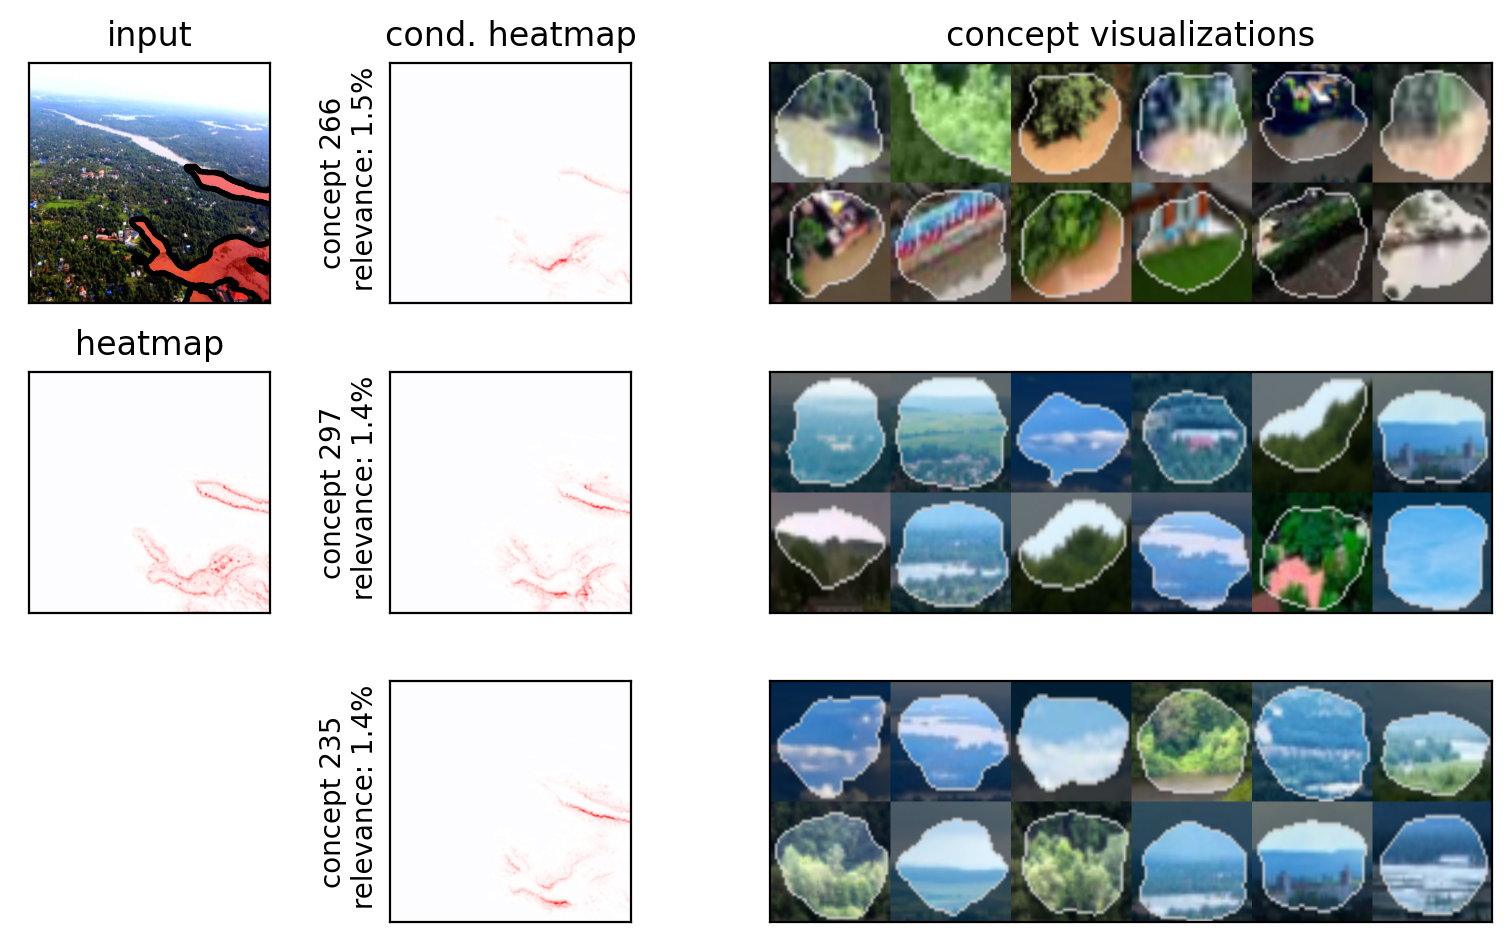

Done plotting.


In [24]:
# Setting up main parameters
class_id = 1
sample_id = 100
n_concepts = 3
n_refimgs = 12
layer = "encoder.features.15"
mode = "relevance"
prediction_num = 0

# if failing, try to restart the notebook and do not run analysis again, go directly to plotting
plot_explanations(model_name, model, dataset, sample_id, class_id, layer, prediction_num, mode, n_concepts, n_refimgs, output_dir=output_dir)

In [ ]:
!pkill -u heydari -f jupyter

Trying the same with a test image

In [18]:
minio_client = MinIOClient()

In [19]:
test_image = minio_client.download_image("naples",  "DJI_20240604153318_0007_V.JPG")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): storage.tema.digital-enabler.eng.it:443
DEBUG:urllib3.connectionpool:https://storage.tema.digital-enabler.eng.it:443 "GET /naples?location= HTTP/1.1" 200 128
DEBUG:urllib3.connectionpool:https://storage.tema.digital-enabler.eng.it:443 "GET /naples/DJI_20240604153318_0007_V.JPG HTTP/1.1" 200 12152832
DEBUG:PIL.TiffImagePlugin:tag: ImageDescription (270) - type: string (2) Tag Location: 22 - Data Location: 902 - value: b'default\x00'
DEBUG:PIL.TiffImagePlugin:tag: Make (271) - type: string (2) - value: b'DJI\x00'
DEBUG:PIL.TiffImagePlugin:tag: Model (272) - type: string (2) - value: b'M3E\x00'
DEBUG:PIL.TiffImagePlugin:tag: Orientation (274) - type: short (3) - value: b'\x01\x00'
DEBUG:PIL.TiffImagePlugin:tag: XResolution (282) - type: rational (5) Tag Location: 70 - Data Location: 910 - value: b'H\x00\x00\x00\x01\x00\x00\x00'
DEBUG:PIL.TiffImagePlugin:tag: YResolution (283) - type: rational (5) Tag Location: 82 - Data Locat

Image downloaded and converted to numpy array successfully.


In [21]:
test_image_path = "../src/datasets/data/General_Flood_v3/RGB/val/JPEG/image_837.jpg"
test_image = plt.imread(test_image_path)

In [22]:
image_tensor = dataset.transform(test_image)
image_tensor = dataset.resize(image_tensor)

/Users/heydari/anaconda3/envs/tema-py/lib/python3.9/site-packages/torchvision/transforms/functional.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:205.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


MEMORY STARTING: CUDA not available
MEMORY AFTER FIGURE CREATION: CUDA not available
MEMORY BEFORE SEGMENTATION ATTR: CUDA not available


ERROR:LCRP.utils.crp:Prediction time: 0.42797017097473145, Backward time: 2.477325677871704, Full attribution time: 2.492513656616211


MEMORY AFTER SEGMENTATION ATTR: CUDA not available
MEMORY AFTER DETECTION/SEGMENTATION: CUDA not available
Concepts: torch.return_types.topk(
values=tensor([0.0220, 0.0173, 0.0140]),
indices=tensor([ 17, 422, 386]))
MEMORY BEFORE CONDITIONAL HEATMAPS: CUDA not available


ERROR:LCRP.utils.crp:Prediction time: 1.222017765045166, Backward time: 6.46926212310791, Full attribution time: 6.489018201828003
DEBUG:src.plot_crp_explanations:Time to compute conditional heatmaps: 7.96s
DEBUG:PIL.TiffImagePlugin:tag: ImageDescription (270) - type: string (2) Tag Location: 22 - Data Location: 1012 - value: b'DCIM\\100MEDIA\\DJI_0883.JPG\x00'
DEBUG:PIL.TiffImagePlugin:tag: Make (271) - type: string (2) Tag Location: 34 - Data Location: 1039 - value: b'DJI\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.TiffImagePlugin:tag: Model (272) - type: string (2) Tag Location: 46 - Data Loca

MEMORY AFTER CONDITIONAL HEATMAPS: CUDA not available
Computing reference images...
MEMORY BEFORE REF IMAGES: CUDA not available


DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 8192
ERROR:LCRP.utils.crp:Prediction time: 0.8830611705780029, Backward time: 4.5455098152160645, Full attribution time: 4.575257778167725
ERROR:LCRP.utils.crp:Prediction time: 0.8560419082641602, Backward time: 4.652889966964722, Full attribution time: 4.6822190284729
ERROR:LCRP.utils.crp:Prediction time: 0.8783841133117676, Backward time: 4.580509185791016, Full attribution time: 4.608211278915405
ERROR:LCRP.utils.crp:Prediction time: 0.8709080219268799, Backward time: 4.530813217163086, Full attribution time: 4.554832220077515
ERROR:LCRP.utils.crp:Prediction time: 0.8702881336212158, Backward time: 4.614267349243164, Full attribution time: 4.643113136291504
ERROR:LCRP.utils.crp:Prediction time: 0.8884379863739014, Backward time: 4.533858060836792, Full attribution time: 4.560189962387085
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 4820
DEBUG:PIL.PngIm

MEMORY AFTER REF IMAGES: CUDA not available
Plotting...
MEMORY PLOTTING CONCEPT 0: CUDA not available
MEMORY PLOTTING CONCEPT 1: CUDA not available


DEBUG:src.plot_crp_explanations:Time to plot: 0.48s


MEMORY PLOTTING CONCEPT 2: CUDA not available
MEMORY AFTER PLOTTING: CUDA not available


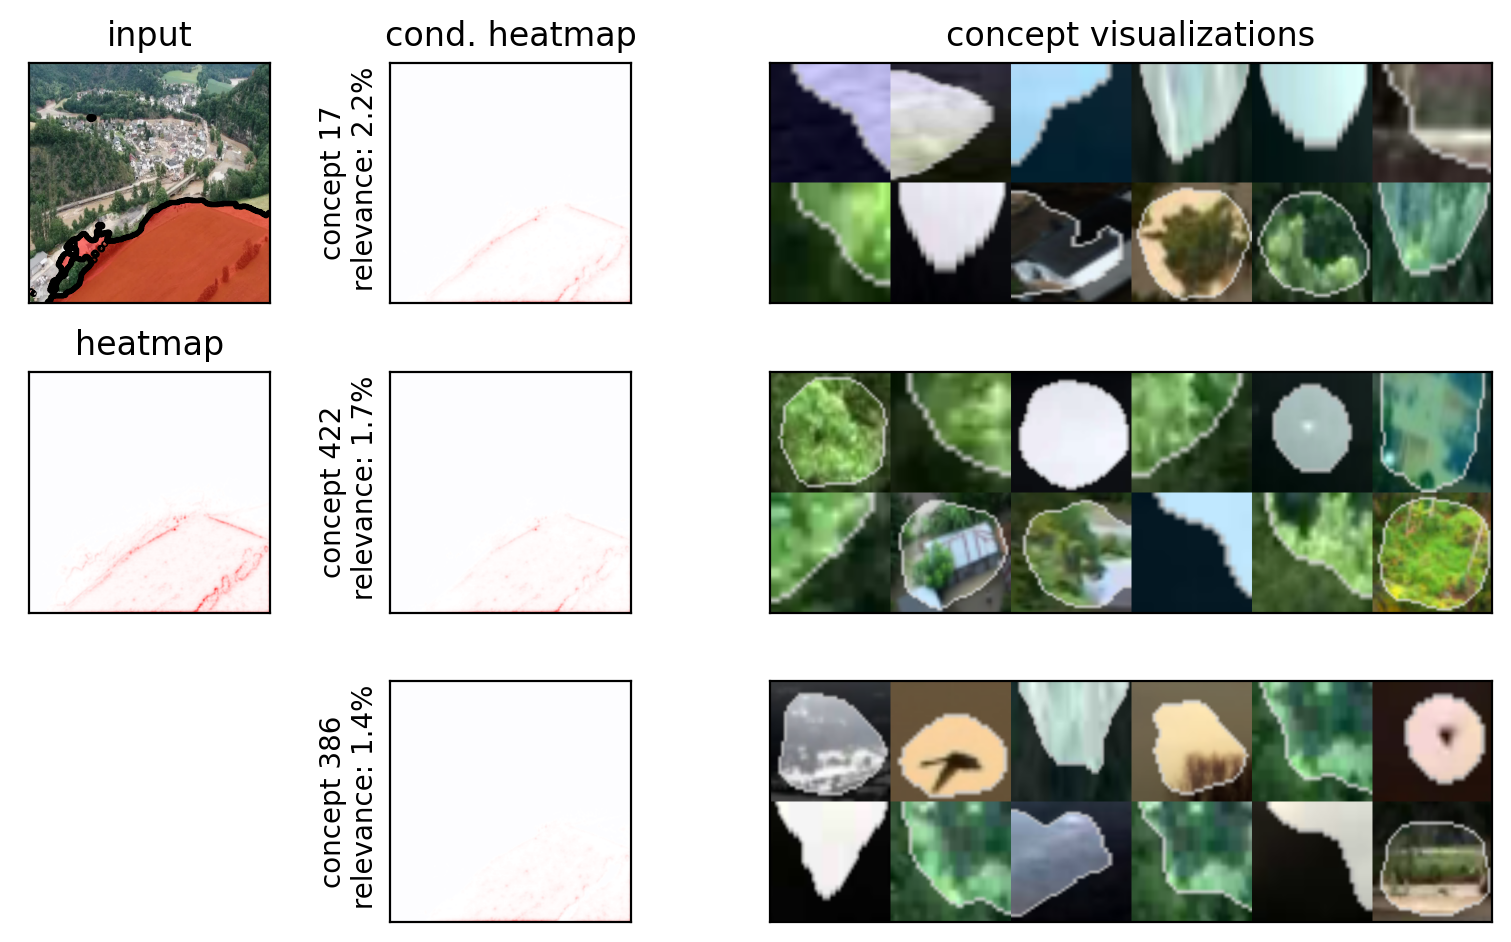

In [23]:
# Setting up main parameters
class_id = 1
sample_id = 100
n_concepts = 3
n_refimgs = 12
layer = "encoder.features.15"
mode = "relevance"
prediction_num = 0


# Generate explanation
explanation_fig = plot_one_image_explanation(
    model_name, model, image_tensor, dataset, 
    class_id, layer, prediction_num, mode, n_concepts, n_refimgs, 
    output_dir=output_dir
)

## Dataset Visualization

Just in case

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 4239
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 4001
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 5703
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 3342
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 4018


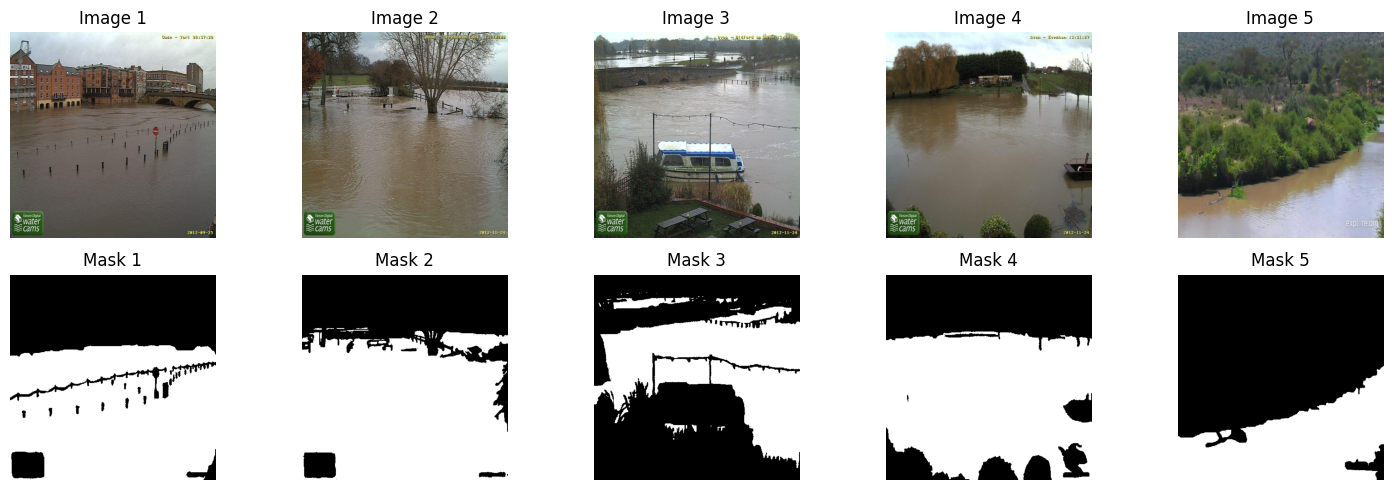

Dataset size: 1055


In [24]:
# Define transformation (if needed)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
])

# Load dataset
root_dir = "../src/datasets/data/General_Flood_v3/"
dataset = FloodDataset(root_dir=root_dir, split="train", transform=transform)

# Visualize 5 images and their masks
num_images = 5
fig, axes = plt.subplots(2, num_images, figsize=(15, 5))  # 2 rows (Images, Masks)

for i in range(num_images):
    image, mask = dataset[i]  # Get image-mask pair
    image = image.permute(1, 2, 0).numpy()  # Convert to (H, W, C)
    mask = mask.squeeze().numpy()  # Remove channel dim

    # Top row: Images
    axes[0, i].imshow(image)
    axes[0, i].set_title(f"Image {i+1}")
    axes[0, i].axis("off")

    # Bottom row: Masks
    axes[1, i].imshow(mask, cmap="gray")
    axes[1, i].set_title(f"Mask {i+1}")
    axes[1, i].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

print(f"Dataset size: {len(dataset)}")

# DLR

## Loading dataset and model

In [28]:
model = get_model(model_name="unet", device=device, classes=1, ckpt_path="../src/models/model_s2burnt_modified.pt", in_channels=4, encoder_name="resnet50")

Loaded checkpoint ../src/models/model_s2burnt_modified.pt


In [29]:
dataset = DatasetDLR(
    img_dir="../../DLR_data/fire_data/train_tiled/img", 
    mask_dir="../../DLR_data/fire_data/train_tiled/msk", 
    normalize_means_stds=[
        [0.1161, 0.1065, 0.1036, 0.2059],  # Means
        [0.0556, 0.0570, 0.0772, 0.1033]   # Stds
    ]
)

Loading images: 0it [00:00, ?it/s]


ValueError: need at least one array to concatenate

In [8]:
len(dataset.img_files)

731

In [9]:
dataset.img_arr.shape

(731, 256, 256, 4)

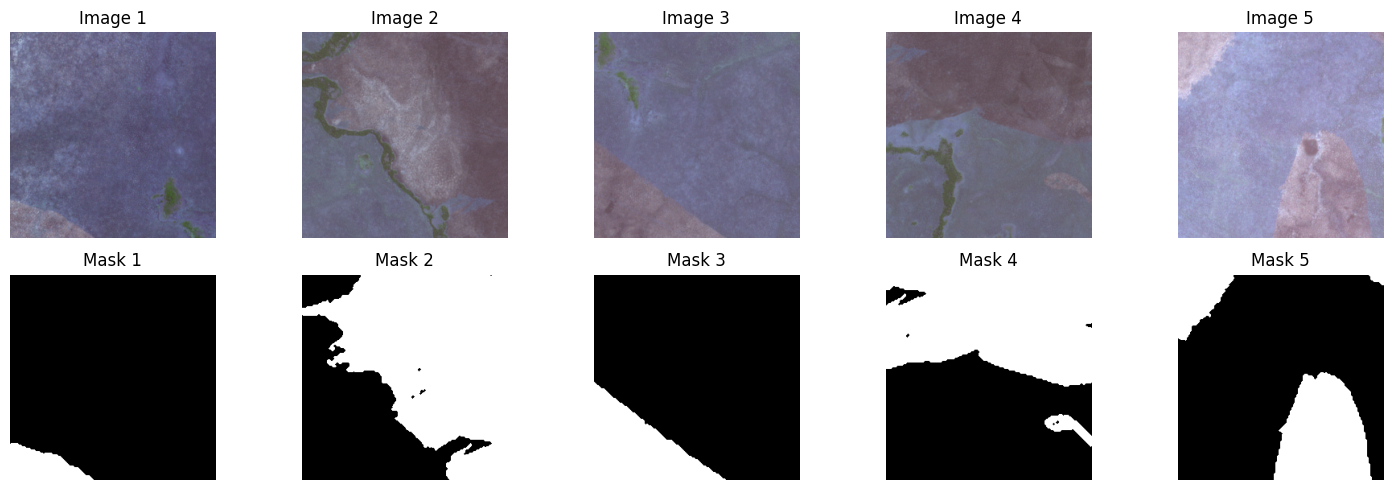

Dataset size: 731


In [10]:
# Visualize 5 images and their masks
num_images = 5
fig, axes = plt.subplots(2, num_images, figsize=(15, 5))  # 2 rows (Images, Masks)

for i in range(num_images):
    image, mask = dataset[i + 5]  # Get image-mask pair
    image = np.array(((image - image.min()) / (image.max() - image.min()) * 255)).astype(np.uint8)
    image = np.transpose(image[:3, :, :].astype(int), (1, 2, 0))  # Convert to (H, W, C)
    mask = mask.squeeze() # Remove channel dim

    # Top row: Images
    axes[0, i].imshow(image)
    axes[0, i].set_title(f"Image {i+1}")
    axes[0, i].axis("off")

    # Bottom row: Masks
    axes[1, i].imshow(mask, cmap="gray")
    axes[1, i].set_title(f"Mask {i+1}")
    axes[1, i].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

print(f"Dataset size: {len(dataset)}")

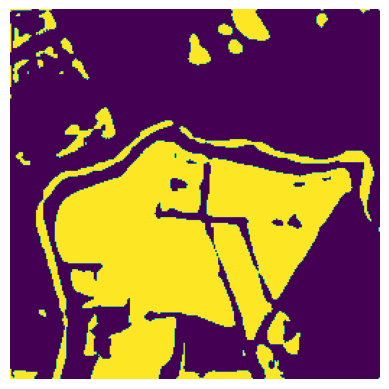

In [11]:
image, mask = dataset[2]
p = model.predict(image.unsqueeze(0))
res = np.array(p[0])
res = (res - res.min()) / (res.max() - res.min())
plt.axis('off')
plt.imshow(res[0] > 0.5)

In [ ]:
# run_analysis("unet", model, dataset, output_dir="output/crp/unet_fire_DLR", device=device)

Running Analysis...


  0%|          | 0/92 [00:00<?, ?it/s]

100%|██████████| 92/92 [07:47<00:00,  5.08s/it]


100%|██████████| 64/64 [00:00<00:00, 1966.76it/s]


torch.Size([4, 256, 256])
Concepts: torch.return_types.topk(
values=tensor([0.0102, 0.0096, 0.0079]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


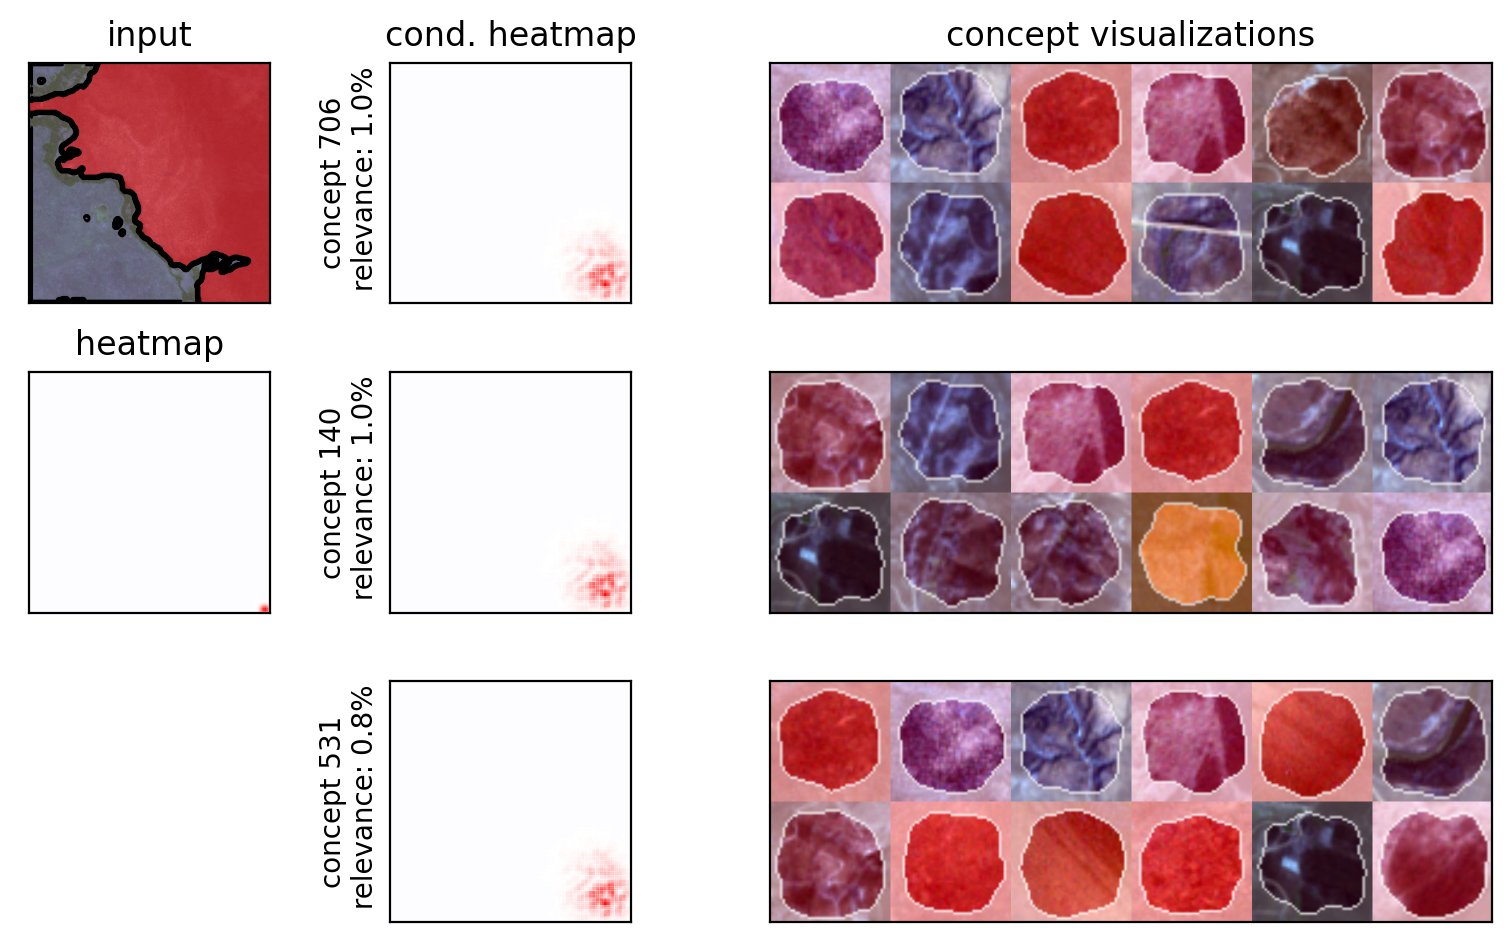

Done plotting.


In [14]:
# Setting up main parameters
model_name = "unet"
output_dir = "../output/crp/unet_fire_DLR"
class_id = 0
sample_id = 6
n_concepts = 3
n_refimgs = 12
layer = "encoder.layer3.0.conv3"
mode = "relevance"
prediction_num = 0

# if failing, try to restart the notebook and do not run analysis again, go directly to plotting
plot_explanations(model_name, model, dataset, sample_id, class_id, layer, prediction_num, mode, n_concepts, n_refimgs, output_dir=output_dir)

In [ ]:
!pkill -u heydari -f jupyter